# Twitter Analysis

Data Analysis of the Twitter data around people talking about economic struggle.

In [1]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
#!pip install altair vega_datasets
# !pip install wordcloud

In [2]:
import pandas as pd
import altair as alt
import spacy
# !python -m spacy download en_core_web_sm
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Import user defined functions
import nlp_analysis as er
import models as ml
import spacy
from spacy.lang.en import English 
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /Users/minu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/minu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/minu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/minu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
## Read data from csv and convert it to pandas dataframe
data = pd.read_csv("../data/data.csv",parse_dates=True)

# Data Exploration and Preprocessing

In [4]:
print("No of tweets available: ", data.shape[0])
print("No of features available: ", data.shape[1])

No of tweets available:  1000
No of features available:  14


In [5]:
print("Columns available:", data.columns)

Columns available: Index(['body', 'clusters_0', 'sentiment_positive_score',
       'sentiment_negative_score', 'sentiment_combined_score',
       'sentiment_summary', 'published_date', 'post_type', 'total_engagement',
       'comments', 'shares', 'likes', 'author_gender', 'followers'],
      dtype='object')


In [6]:
data.head()

,body,clusters_0,sentiment_positive_score,sentiment_negative_score,sentiment_combined_score,sentiment_summary,published_date,post_type,total_engagement,comments,shares,likes,author_gender,followers
0,During the pandemic government workers have de...,Poor Pay,7.170060,1.118036,1.511767,positive,"Nov 22, 2020",Reposts,0,0,0,0,Unknown,45747
1,I didn’t realize how poor I was until I got a ...,Poor Pay,3.428319,4.349932,-0.584664,negative,"May 7, 2021",Reposts,0,0,0,0,Female,82152
2,British people have this really dumb complex w...,Cost of Living,1.277756,3.769611,-1.428440,negative,"Jan 2, 2021",Reposts,0,0,0,0,Unknown,13581
3,Tory MPs have voted against a ban on residents...,Poor Pay,3.365988,5.851462,-0.899544,negative,"Apr 27, 2021",Reposts,0,0,0,0,Male,2976
4,The trouble with Rishi Sunak's upbeat message ...,Wage Growth,5.453477,2.944297,0.269810,neutral,"Oct 28, 2021",Reposts,0,0,0,0,Male,32501


In [7]:
data.describe()

,sentiment_positive_score,sentiment_negative_score,sentiment_combined_score,total_engagement,comments,shares,likes,followers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.402236,3.554234,-0.377169,9.338000,0.291000,2.400000,6.647000,7578.757000
std,1.439711,1.537124,0.841714,148.947323,3.526578,38.745751,106.932366,31125.442426
min,0.813117,0.638878,-1.942425,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.303243,2.336901,-1.051523,0.000000,0.000000,0.000000,0.000000,322.500000
50%,3.183325,3.490972,-0.394248,0.000000,0.000000,0.000000,0.000000,1294.500000
75%,4.244433,4.640717,0.269810,0.000000,0.000000,0.000000,0.000000,4188.500000
max,7.680856,7.754159,1.753141,4349.000000,97.000000,1126.000000,3126.000000,488136.000000


In [8]:
data.dtypes

body                         object
clusters_0                   object
sentiment_positive_score    float64
sentiment_negative_score    float64
sentiment_combined_score    float64
sentiment_summary            object
published_date               object
post_type                    object
total_engagement              int64
comments                      int64
shares                        int64
likes                         int64
author_gender                object
followers                     int64
dtype: object

### Glimpse of few tweets

In [9]:

doc = nlp(data.body[233])
displacy.render(doc, style="ent")

In [10]:
doc = nlp(data.body[139])
displacy.render(doc, style="ent")

In [11]:
text = data.body
entity_df,token_df = er.entityRecog(text)
entity_df.loc[entity_df['index'] == 233]

,index,Label,Text
455,233,ORG,NL
456,233,DATE,yesterday
457,233,MONEY,600
458,233,LOC,Celtic Park


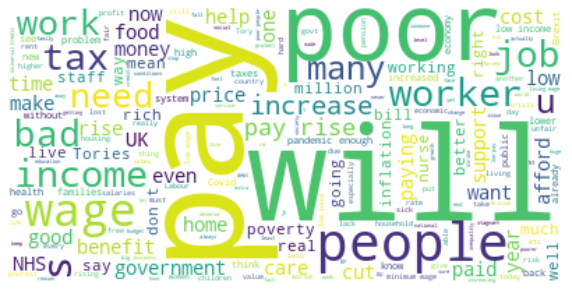

In [12]:
text = " ".join(tweet for tweet in data.body)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
stopwords.update(["will", "one", "much", "make", "many"])
# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Understanding Timeline of Tweets

Timeline of Tweets : The date range in which the tweets were posted.

The date column : published_date is converted into required format for identifying the timeline

In [13]:
data['published_date'] = pd.to_datetime(data['published_date']).dt.strftime('%Y-%m-%d')

In [14]:
print("Tweets were posted from " ,data['published_date'].min(), " to ",data['published_date'].max())

Tweets were posted from  2020-11-10  to  2021-11-10


### Understanding the type of tweets

In [15]:
pd.pivot_table(data,values='sentiment_summary', index=['post_type'], aggfunc='count',fill_value=0).reset_index()

,post_type,sentiment_summary
0,Original,161
1,Replies,348
2,Reposts,491


### Understanding Sentiment Combined Score

In [16]:
alt.Chart(data,width=300,height=400,title="Sentiment scores").mark_line().encode(#x=alt.X('x'),
    y='sentiment_combined_score',color=alt.Color('sentiment_summary',scale=alt.Scale(scheme='set1')),tooltip=['sentiment_summary','post_type','sentiment_combined_score:N']).interactive()


alt.Chart(...)

From the plot, we can see that
* Postive sentiment is when the combined sentiment score is above 1
* Negative sentiment is when the combined sentiment score is below -0.81 
* Neutral sentiment is when the combined sentiment score is between 1 and -0.81

In [17]:
alt.Chart(data,width=850,height=300,title="Sentiment scores").mark_circle(size=10).encode(x=alt.X('clusters_0'),
    y='sentiment_combined_score',color=alt.Color('post_type',scale=alt.Scale(scheme='set1')),tooltip=['sentiment_summary','post_type','sentiment_combined_score:N']).interactive()


alt.Chart(...)

In [18]:
bars = alt.Chart(data,width=700,height=300,title="Sentiment scores").mark_bar().encode(
    x=alt.X('count(post_type)', stack='zero'),
    y=alt.Y('clusters_0'),
    color=alt.Color('sentiment_combined_score',scale=alt.Scale(scheme='paired'))).interactive()

text = alt.Chart(data).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('count(post_type)', stack='zero'),
    y=alt.Y('clusters_0'),
    detail='post_type',
    text=alt.Text('count(post_type)', format='.1f'),
    tooltip=['sentiment_summary','post_type','count(post_type)']).interactive()

bars + text

alt.LayerChart(...)

<AxesSubplot:>

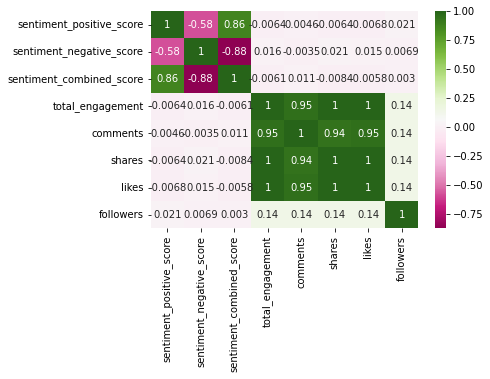

In [19]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='PiYG',annot=True)

## Data Modelling

In [20]:
## Split dataset into training set and test set
X,y,df = ml.model_input(data)

split the tweet into tokens..
tokenization is completed.
Google work to vector process started..
Vectorisation is completed..


In [22]:
model_result,final_model,best_X_train, best_X_test, best_y_train, best_y_test,max_em = ml.find_best_model(X, y,df)

Best model for the dataset is  SVM
Best model's accuracy score is  61.2 %


In [23]:
alt.Chart(max_em).mark_point().encode(
x=alt.X('x'),
y=alt.Y('y'),
color='sentiment_summary',
    tooltip=['body','sentiment_summary','color'])

alt.Chart(...)